In [1]:
import numpy as np
import pandas as pd

In [38]:
data = pd.read_csv("breast cancer.csv")
breast=data.copy;

In [3]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breast.shape

(569, 33)

In [5]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 2. Data Preprocessing

In [6]:
breast.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
breast.drop('Unnamed: 32', axis=1, inplace=True)

# Encoding the Target Variable

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

# Splitting Data into Training and Testing Sets

In [10]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
breast=breast.drop("id",axis=1)
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)

C:\Users\kiris\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


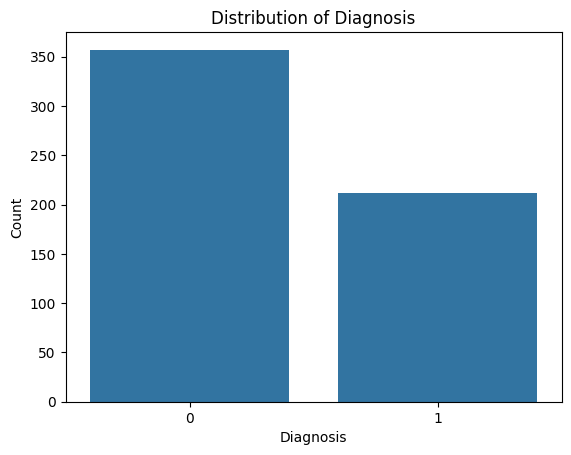

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
sns.countplot(x=breast['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [13]:
# Visualize the correlation matrix
breast.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# Training Model

In [14]:
# for now we have used logistic regression (you can try more models)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the performance on the testing set
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy:', accuracy_lr)

Accuracy: 0.9736842105263158


In [15]:
# -0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
#         1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
#         2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
#        -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
#         0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
#         1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
#         3.15970842
        
        
        
        
        
#   -0.23711093, -0.4976419 ,  0.61365274, -0.49813131, -0.53102815,
#        -0.57694824, -0.17494424, -0.36215622, -0.284859  ,  0.43345165,
#         0.17818232, -0.36844966,  0.55310406, -0.31671104, -0.40524636,
#         0.04025752, -0.03795529, -0.18043065,  0.16478901, -0.12170969,
#         0.23079329, -0.50044002,  0.81940367, -0.46922838, -0.53308833,
#        -0.04910117, -0.04160193, -0.14913653,  0.09681787,  0.10617647,
#         0.49035329      

# Prediction System

In [16]:
import numpy as np

input_text = ( -4.86316639e-01, -3.53185181e-01, -4.28570481e-01,
       -5.26233375e-01,  6.94290165e-01,  5.33852005e-01, -1.44722492e-01,
       -5.33686185e-01,  4.80269963e-05,  1.14738647e+00, -7.96592458e-01,
        4.75491804e-01, -3.16227696e-01, -5.22234219e-01,  9.86065565e-01,
        3.93545399e-01,  4.91628995e-01, -3.56185766e-02,  1.58825584e-01,
        7.84658928e-01, -6.98110538e-01, -4.33394151e-01, -5.24720659e-01,
       -6.36959480e-01,  5.84108718e-01,  6.56028507e-02, -1.63957163e-01,
       -6.20376709e-01, -5.53284785e-01,  5.45322153e-01)
np_df = np.asarray(input_text)
pred = lr.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("Cancrous")
else:
    print("Not Cancrous")

Not Cancrous


In [17]:
X_test[3]

array([-4.86316639e-01, -3.53185181e-01, -4.28570481e-01, -5.26233375e-01,
        6.94290165e-01,  5.33852005e-01, -1.44722492e-01, -5.33686185e-01,
        4.80269963e-05,  1.14738647e+00, -7.96592458e-01,  4.75491804e-01,
       -3.16227696e-01, -5.22234219e-01,  9.86065565e-01,  3.93545399e-01,
        4.91628995e-01, -3.56185766e-02,  1.58825584e-01,  7.84658928e-01,
       -6.98110538e-01, -4.33394151e-01, -5.24720659e-01, -6.36959480e-01,
        5.84108718e-01,  6.56028507e-02, -1.63957163e-01, -6.20376709e-01,
       -5.53284785e-01,  5.45322153e-01])

# Save Model 

In [21]:
import pickle
pickle.dump(lr,open('breast_cancer.pkl','wb'))
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [22]:
import sklearn

print(sklearn.__version__)  # use the same version in deployment as well (pycharm)

1.3.2


In [45]:
data.iloc[10].values

array(['M', 16.02, 23.24, 102.7, 797.8, 0.08206, 0.06669, 0.03299,
       0.03323, 0.1528, 0.05697, 0.3795, 1.187, 2.466, 40.51, 0.004029,
       0.009269, 0.01101, 0.007591, 0.0146, 0.003042, 19.19, 33.88, 123.8,
       1150.0, 0.1181, 0.1551, 0.1459, 0.09975, 0.2948, 0.08452],
      dtype=object)

In [42]:
data.head(50)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
